# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [26]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


In [27]:
sinasc_raw.select_dtypes(include=['number']).columns


Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES', 'CONSULTAS',
       'HORANASC', 'APGAR1', 'APGAR5', 'PESO', 'IDANOMAL', 'NUMEROLOTE',
       'DIFDATA', 'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU',
       'ESCMAE2010', 'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT',
       'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC',
       'TPMETESTIM', 'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART',
       'STCESPARTO', 'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC',
       'ESCMAEAGR1', 'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON',
       'PARIDADE', 'KOTELCHUCK', 'CONTADOR', 'munResLat', 'munResLon',
       'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [28]:
sinasc_raw['Latitude_Faixa'] = sinasc_raw['munResLat'].apply(lambda x: 'Acima_de_-10.5' if x > -10.5 else 'Abaixo_de_-10.5')


colunas = ['SERIESCMAE', 'QTDFILVIVO']

result = sinasc_raw.groupby('Latitude_Faixa')[colunas].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

result


SERIESCMAE                                                 \
                       sum      mean  min  max median       std       var   
Latitude_Faixa                                                              
Abaixo_de_-10.5    36111.0  4.011442  1.0  8.0    3.0  2.298080  5.281171   
Acima_de_-10.5     23885.0  4.493040  1.0  8.0    3.0  2.459177  6.047553   

                QTDFILVIVO                                                  
                       sum      mean  min   max median       std       var  
Latitude_Faixa                                                              
Abaixo_de_-10.5    12601.0  0.980012  0.0  30.0    1.0  1.138256  1.295626  
Acima_de_-10.5     14226.0  1.129317  0.0  12.0    1.0  1.198613  1.436674

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [29]:
sinasc_raw['Area'] = sinasc_raw['munResArea'].apply(lambda x: 'Acima_de_3000' if x > 3000 else 'Abaixo_de_3000')


colunas = ['ESCMAE2010', 'IDANOMAL']

result_area = sinasc_raw.groupby('Area')[colunas].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

result_area

ESCMAE2010                                                 \
                      sum      mean  min  max median       std       var   
Area                                                                       
Abaixo_de_3000    15803.0  3.052540  0.0  9.0    3.0  1.073399  1.152185   
Acima_de_3000     65617.0  3.037543  0.0  9.0    3.0  1.094459  1.197841   

               IDANOMAL                                                 
                    sum      mean  min  max median       std       var  
Area                                                                    
Abaixo_de_3000  10464.0  2.013082  1.0  9.0    2.0  0.385196  0.148376  
Acima_de_3000   43204.0  2.034182  1.0  9.0    2.0  0.552080  0.304793

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [30]:
sinasc_raw['Altitude_Faixa'] = sinasc_raw['munResAlt'].apply(lambda x: 'Acima_de_400' if x > 400 else 'Abaixo_de_400')


colunas = ['SERIESCMAE', 'QTDFILVIVO']

result = sinasc_raw.groupby('Altitude_Faixa')[colunas].agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

result


SERIESCMAE                                                 \
                      sum      mean  min  max median       std       var   
Altitude_Faixa                                                             
Abaixo_de_400     55324.0  4.215162  1.0  8.0    3.0  2.376424  5.647393   
Acima_de_400       4672.0  3.916178  1.0  8.0    3.0  2.287920  5.234579   

               QTDFILVIVO                                                  
                      sum      mean  min   max median       std       var  
Altitude_Faixa                                                             
Abaixo_de_400     25173.0  1.064083  0.0  30.0    1.0  1.179968  1.392325  
Acima_de_400       1654.0  0.919911  0.0  10.0    1.0  1.034859  1.070933

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


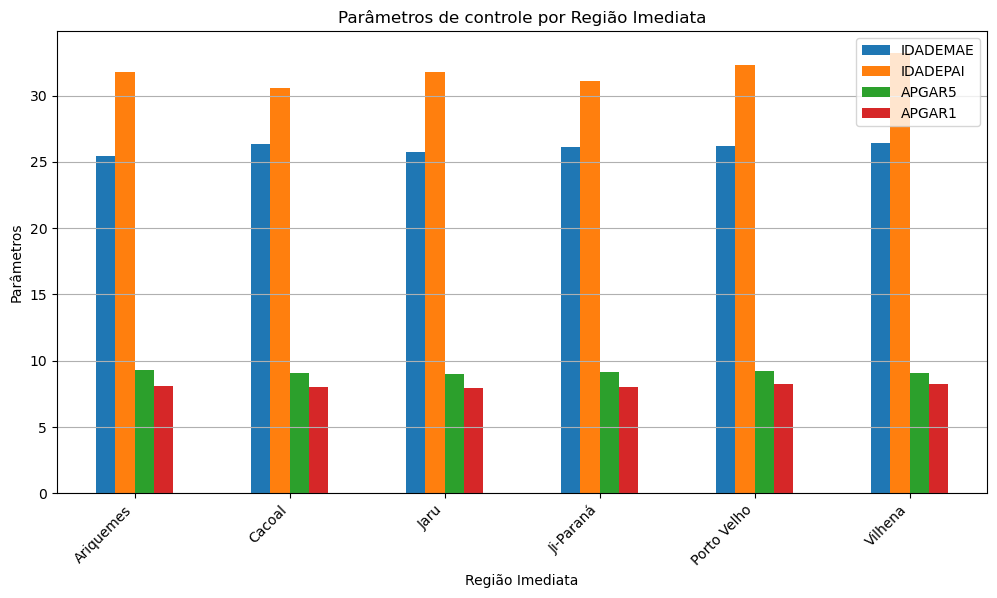

In [31]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

sinasc_raw['Regiao_Imediata'] = sinasc_raw['munResNome'].map(imediatas)

df_grouped = sinasc_raw.groupby('Regiao_Imediata')[['IDADEMAE','IDADEPAI','APGAR5','APGAR1']].mean()

df_grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Parâmetros de controle por Região Imediata')
plt.xlabel('Região Imediata')
plt.ylabel('Parâmetros')
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y')
plt.show()


### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [32]:
divisao_IDH = {
    "Porto Velho": "IDH-M Alto",
    "Vilhena": "IDH-M Alto",
    "Cacoal": "IDH-M Alto",
    "Ji-Paraná": "IDH-M Alto",
    "Pimenta Bueno": "IDH-M Alto",
    "Ariquemes": "IDH-M Alto",
    "Rolim de Moura": "IDH-M Alto",
    "Cerejeiras": "IDH-M Médio",
    "Jaru": "IDH-M Médio",
    "Colorado do Oeste": "IDH-M Médio",
    "Ouro Preto do Oeste": "IDH-M Médio",
    "Espigão D'Oeste": "IDH-M Médio",
    "Santa Luzia D'Oeste": "IDH-M Médio",
    "Pimenteiras do Oeste": "IDH-M Médio",
    "Presidente Médici": "IDH-M Médio",
    "Castanheiras": "IDH-M Médio",
    "Guajará-Mirim": "IDH-M Médio",
    "Chupinguaia": "IDH-M Médio",
    "Cabixi": "IDH-M Médio",
    "Candeias do Jamari": "IDH-M Médio",
    "São Felipe D'Oeste": "IDH-M Médio",
    "Cacaulândia": "IDH-M Médio",
    "São Miguel do Guaporé": "IDH-M Médio",
    "Mirante da Serra": "IDH-M Médio",
    "Alvorada D'Oeste": "IDH-M Médio",
    "Teixeirópolis": "IDH-M Médio",
    "Nova Brasilândia D'Oeste": "IDH-M Médio",
    "Rio Crespo": "IDH-M Médio",
    "Primavera de Rondônia": "IDH-M Médio",
    "Alta Floresta D'Oeste": "IDH-M Médio",
    "Ministro Andreazza": "IDH-M Médio",
    "Novo Horizonte do Oeste": "IDH-M Médio",
    "Vale do Paraíso": "IDH-M Médio",
    "Alto Paraíso": "IDH-M Médio",
    "Parecis": "IDH-M Médio",
    "Buritis": "IDH-M Médio",
    "Itapuã do Oeste": "IDH-M Médio",
    "Corumbiara": "IDH-M Médio",
    "Cujubim": "IDH-M Médio",
    "Costa Marques": "IDH-M Médio",
    "São Francisco do Guaporé": "IDH-M Médio",
    "Urupá": "IDH-M Médio",
    "Monte Negro": "IDH-M Médio",
    "Nova Mamoré": "IDH-M Baixo",
    "Campo Novo de Rondônia": "IDH-M Baixo",
    "Governador Jorge Teixeira": "IDH-M Baixo",
    "Machadinho D'Oeste": "IDH-M Baixo",
    "Theobroma": "IDH-M Baixo",
    "Vale do Anari": "IDH-M Baixo",
    "Nova União": "IDH-M Baixo",
    "Seringueiras": "IDH-M Baixo",
    "Alto Alegre dos Parecis": "IDH-M Baixo",
}

sinasc_raw['divisao_IDH'] = sinasc_raw['munResNome'].map(divisao_IDH)

sinasc_raw

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResUf,munResLat,munResLon,munResAlt,munResArea,Latitude_Faixa,Area,Altitude_Faixa,Regiao_Imediata,divisao_IDH
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo_de_-10.5,Acima_de_3000,Abaixo_de_400,Cacoal,IDH-M Médio
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo_de_-10.5,Acima_de_3000,Abaixo_de_400,Cacoal,IDH-M Médio
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo_de_-10.5,Acima_de_3000,Abaixo_de_400,Cacoal,IDH-M Médio
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,Rondônia,-12.13178,-61.85308,397.0,3958.273,Abaixo_de_-10.5,Acima_de_3000,Abaixo_de_400,Cacoal,IDH-M Baixo
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,Rondônia,-11.93554,-61.99982,338.0,7067.025,Abaixo_de_-10.5,Acima_de_3000,Abaixo_de_400,Cacoal,IDH-M Médio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,Rondônia,-12.74137,-60.13858,595.0,11518.915,Abaixo_de_-10.5,Acima_de_3000,Acima_de_400,Vilhena,IDH-M Alto
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,Rondônia,-12.55684,-60.90185,340.0,5126.723,Abaixo_de_-10.5,Acima_de_3000,Abaixo_de_400,Vilhena,IDH-M Médio
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,Rondônia,-12.74137,-60.13858,595.0,11518.915,Abaixo_de_-10.5,Acima_de_3000,Acima_de_400,Vilhena,IDH-M Alto
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,Rondônia,-12.74137,-60.13858,595.0,11518.915,Abaixo_de_-10.5,Acima_de_3000,Acima_de_400,Vilhena,IDH-M Alto


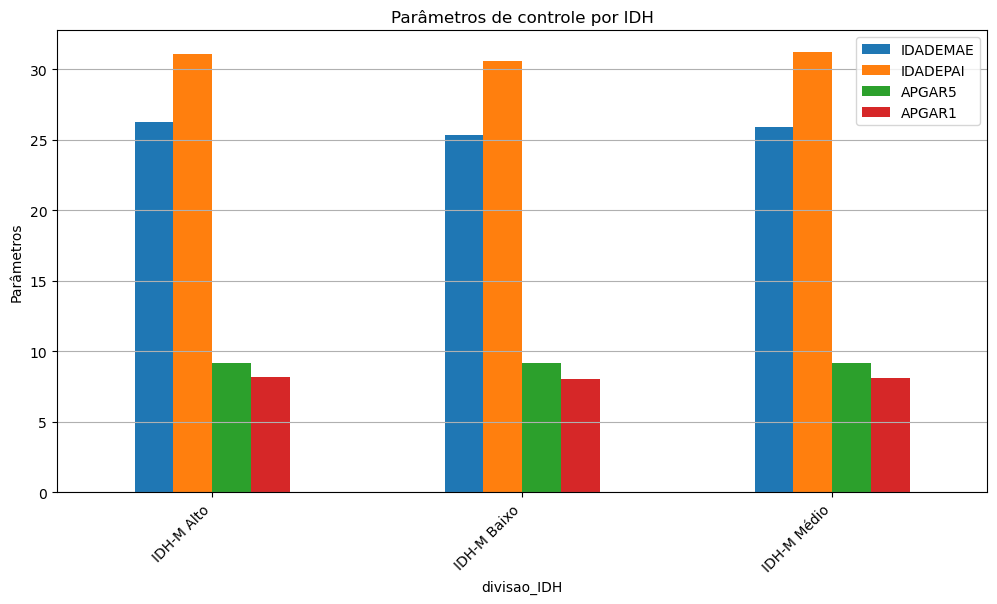

In [33]:
df_grouped = sinasc_raw.groupby('divisao_IDH')[['IDADEMAE','IDADEPAI','APGAR5','APGAR1']].mean()

df_grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Parâmetros de controle por IDH')
plt.xlabel('divisao_IDH')
plt.ylabel('Parâmetros')
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y')
plt.show()

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [34]:
divisao_IFDM = {
    "Ariquemes": "Desenvolvimento Moderado",
    "Vilhena": "Desenvolvimento Moderado",
    "Pimenta Bueno": "Desenvolvimento Moderado",
    "Porto Velho": "Desenvolvimento Moderado",
    "Ji-Paraná": "Desenvolvimento Moderado",   
    "Cacoal": "Desenvolvimento Moderado",
    "Santa Luzia D'Oeste": "Desenvolvimento Moderado",   
    "Rolim de Moura": "Desenvolvimento Moderado",
    "Chupinguaia": "Desenvolvimento Moderado",
    "São Miguel do Guaporé": "Desenvolvimento Moderado",
    "Pimenteiras do Oeste": "Desenvolvimento Moderado",
    "Teixeirópolis": "Desenvolvimento Moderado",
    "Colorado do Oeste": "Desenvolvimento Moderado",
    "Jaru": "Desenvolvimento Moderado",
    "Rio Crespo": "Desenvolvimento Moderado",
    "Primavera de Rondônia": "Desenvolvimento Moderado",
    "Alta Floresta D'Oeste": "Desenvolvimento Moderado",
    "Ouro Preto do Oeste": "Desenvolvimento Moderado",
    "São Francisco do Guaporé": "Desenvolvimento Moderado",
    "Candeias do Jamari": "Desenvolvimento Moderado",
    "Buritis": "Desenvolvimento Moderado",
    "São Felipe D'Oeste": "Desenvolvimento Moderado",
    "Presidente Médici": "Desenvolvimento Moderado",
    "Cerejeiras": "Desenvolvimento Moderado",
    "Monte Negro": "Desenvolvimento Moderado",
    "Urupá": "Desenvolvimento Moderado",
    "Espigão D'Oeste": "Desenvolvimento Regular",
    "Castanheiras": "Desenvolvimento Regular",
    "Guajará-Mirim": "Desenvolvimento Regular",
    "Cabixi": "Desenvolvimento Regular",
    "Cacaulândia": "Desenvolvimento Regular",
    "Mirante da Serra": "Desenvolvimento Regular",
    "Alvorada D'Oeste": "Desenvolvimento Regular",
    "Nova Brasilândia D'Oeste": "Desenvolvimento Regular",
    "Ministro Andreazza": "Desenvolvimento Regular",
    "Novo Horizonte do Oeste": "Desenvolvimento Regular",
    "Vale do Paraíso": "Desenvolvimento Regular",
    "Alto Paraíso": "Desenvolvimento Regular",
    "Parecis": "Desenvolvimento Regular",
    "Itapuã do Oeste": "Desenvolvimento Regular",
    "Corumbiara": "Desenvolvimento Regular",
    "Cujubim": "Desenvolvimento Regular",
    "Costa Marques": "Desenvolvimento Regular",
    "Nova Mamoré": "Desenvolvimento Regular",
    "Campo Novo de Rondônia": "Desenvolvimento Regular",
    "Governador Jorge Teixeira": "Desenvolvimento Regular",
    "Machadinho D'Oeste": "Desenvolvimento Regular",
    "Theobroma": "Desenvolvimento Regular",
    "Vale do Anari": "Desenvolvimento Regular",
    "Nova União": "Desenvolvimento Regular",
    "Seringueiras": "Desenvolvimento Regular",
    "Alto Alegre dos Parecis": "Desenvolvimento Regular",
}

sinasc_raw['divisao_IFDM'] = sinasc_raw['munResNome'].map(divisao_IFDM)

sinasc_raw

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,munResLat,munResLon,munResAlt,munResArea,Latitude_Faixa,Area,Altitude_Faixa,Regiao_Imediata,divisao_IDH,divisao_IFDM
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,-11.93554,-61.99982,338.0,7067.025,Abaixo_de_-10.5,Acima_de_3000,Abaixo_de_400,Cacoal,IDH-M Médio,Desenvolvimento Moderado
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,-11.93554,-61.99982,338.0,7067.025,Abaixo_de_-10.5,Acima_de_3000,Abaixo_de_400,Cacoal,IDH-M Médio,Desenvolvimento Moderado
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,-11.93554,-61.99982,338.0,7067.025,Abaixo_de_-10.5,Acima_de_3000,Abaixo_de_400,Cacoal,IDH-M Médio,Desenvolvimento Moderado
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,-12.13178,-61.85308,397.0,3958.273,Abaixo_de_-10.5,Acima_de_3000,Abaixo_de_400,Cacoal,IDH-M Baixo,Desenvolvimento Regular
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,-11.93554,-61.99982,338.0,7067.025,Abaixo_de_-10.5,Acima_de_3000,Abaixo_de_400,Cacoal,IDH-M Médio,Desenvolvimento Moderado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,-12.74137,-60.13858,595.0,11518.915,Abaixo_de_-10.5,Acima_de_3000,Acima_de_400,Vilhena,IDH-M Alto,Desenvolvimento Moderado
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,-12.55684,-60.90185,340.0,5126.723,Abaixo_de_-10.5,Acima_de_3000,Abaixo_de_400,Vilhena,IDH-M Médio,Desenvolvimento Moderado
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,-12.74137,-60.13858,595.0,11518.915,Abaixo_de_-10.5,Acima_de_3000,Acima_de_400,Vilhena,IDH-M Alto,Desenvolvimento Moderado
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,-12.74137,-60.13858,595.0,11518.915,Abaixo_de_-10.5,Acima_de_3000,Acima_de_400,Vilhena,IDH-M Alto,Desenvolvimento Moderado


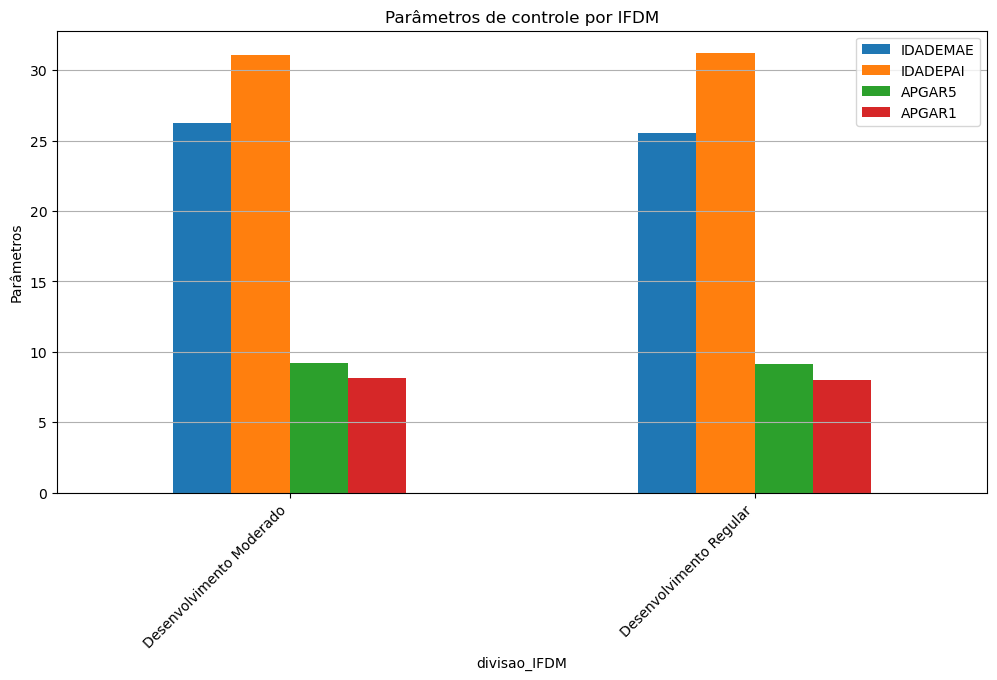

In [35]:
df_grouped = sinasc_raw.groupby('divisao_IFDM')[['IDADEMAE','IDADEPAI','APGAR5','APGAR1']].mean()

df_grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Parâmetros de controle por IFDM')
plt.xlabel('divisao_IFDM')
plt.ylabel('Parâmetros')
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y')
plt.show()

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


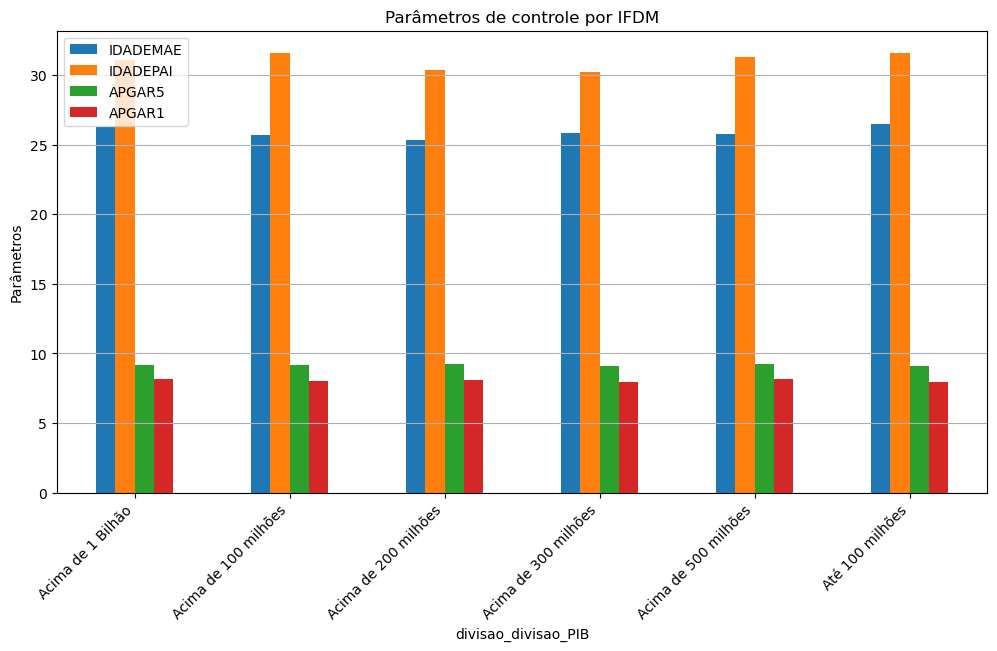

In [36]:
divisao_PIB = {
    "Porto Velho": "Acima de 1 Bilhão",
    "Ji-Paraná": "Acima de 1 Bilhão",
    "Vilhena": "Acima de 1 Bilhão",
    "Ariquemes": "Acima de 1 Bilhão",
    "Cacoal": "Acima de 1 Bilhão",
    "Jaru": "Acima de 1 Bilhão",
    "Rolim de Moura": "Acima de 1 Bilhão",
    "Pimenta Bueno": "Acima de 1 Bilhão",
    
    "Guajará-Mirim": "Acima de 500 milhões",
    "Ouro Preto do Oeste": "Acima de 500 milhões",
    "Buritis": "Acima de 500 milhões",
    "Machadinho D'Oeste": "Acima de 500 milhões",
    "Espigão D'Oeste": "Acima de 500 milhões",
    "São Miguel do Guaporé": "Acima de 500 milhões",
    "Candeias do Jamari": "Acima de 500 milhões",
    "Nova Mamoré": "Acima de 500 milhões",
    "Cerejeiras": "Acima de 500 milhões",
    
    "Alta Floresta D'Oeste": "Acima de 300 milhões",
    "Presidente Médici": "Acima de 300 milhões",
    "Cujubim": "Acima de 300 milhões",
    "Nova Brasilândia D'Oeste": "Acima de 300 milhões",
    "Alto Paraíso": "Acima de 300 milhões",
    "São Francisco do Guaporé": "Acima de 300 milhões",
    "Colorado do Oeste": "Acima de 300 milhões",
    
    "Monte Negro": "Acima de 200 milhões",
    "Alto Alegre dos Parecis": "Acima de 200 milhões",
    "Campo Novo de Rondônia": "Acima de 200 milhões",
    "Alvorada D'Oeste": "Acima de 200 milhões",
    
    "Chupinguaia": "Acima de 100 milhões",
    "Corumbiara": "Acima de 100 milhões",
    "Ministro Andreazza": "Acima de 100 milhões",
    "Urupá": "Acima de 100 milhões",
    "Costa Marques": "Acima de 100 milhões",
    "Seringueiras": "Acima de 100 milhões",
    "Mirante da Serra": "Acima de 100 milhões",
    "Governador Jorge Teixeira": "Acima de 100 milhões",
    "Theobroma": "Acima de 100 milhões",
    "Santa Luzia D'Oeste": "Acima de 100 milhões",
    "Novo Horizonte do Oeste": "Acima de 100 milhões",
    "Itapuã do Oeste": "Acima de 100 milhões",
    "Vale do Paraíso": "Acima de 100 milhões", 
    "Cacaulândia": "Acima de 100 milhões",
    "Cabixi": "Acima de 100 milhões",
    "Vale do Anari": "Acima de 100 milhões",
    
    "Rio Crespo": "Até 100 milhões",
    "Nova União": "Até 100 milhões",
    "Teixeirópolis": "Até 100 milhões",
    "Castanheiras": "Até 100 milhões",
    "Parecis": "Até 100 milhões",
    "Primavera de Rondônia": "Até 100 milhões",
    "São Felipe D'Oeste": "Até 100 milhões",
    "Pimenteiras do Oeste": "Até 100 milhões"
}

sinasc_raw['divisao_PIB'] = sinasc_raw['munResNome'].map(divisao_PIB)

df_grouped = sinasc_raw.groupby('divisao_PIB')[['IDADEMAE','IDADEPAI','APGAR5','APGAR1']].mean()

df_grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Parâmetros de controle por IFDM')
plt.xlabel('divisao_divisao_PIB')
plt.ylabel('Parâmetros')
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y')
plt.show()

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

### **Conclusão**

Ao ser feita a comparação de todos dados recebidos é possível verificar que todos paramentros estão interligados, onde a região intermediária, IDH, IFDM e o PIB podem ser relacionados entre si.

Não foi possivel notar uma diferença muito grande quando relacionado as idades e APGAR mas é visto que as maiores idades médias das mães e melhores condições de APGAR se encontram nos locais com melhores índices e consequentemente em areas intermediárias que ficam próximas a Porto Velho e Vilhena, que possuem indices de desenvolvimento mais elevado.